# Email spam classification project

### Initial data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('shuffle_email_spam_classification.csv')
print("\nInformation about the initial data:")
data.info()
print("\nDisplaying first 15 rows to visualise what the the initial data looks like:")
data.head(15)


Information about the initial data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB

Displaying first 15 rows to visualise what the the initial data looks like:


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


### Data preprocessing

In [2]:
# Drop the first column (email id) - it is unnecessary since it won't be used for training
data = data.iloc[:, 1:]

In [3]:
# Handle missing values (if there are any) by filling with zeros
data.fillna(0, inplace=True)

In [4]:
# Check for columns with only zeros
zero_columns = data.columns[data.eq(0).all()]

# Remove columns with only zeros
data = data.drop(columns=zero_columns)


Comparing the counts of the first 20 words in all emails:


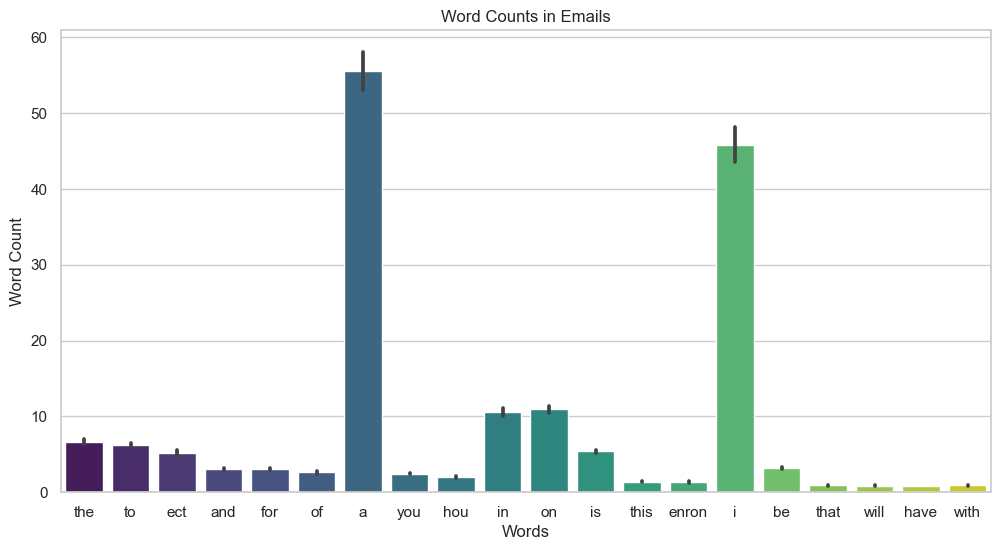

In [5]:
columns_to_visualize = data.columns[:20]

data_selected = data[columns_to_visualize]

print("\nComparing the counts of the first 20 words in all emails:")

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the counts for the selected words
sns.set(style="whitegrid")
ax = sns.barplot(data=data_selected, palette="viridis")
ax.set_ylabel('Word Count')
ax.set_xlabel('Words')
ax.set_title('Word Counts in Emails')
plt.show()

### Splitting data into training and testing sets

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

print("\nInformation about the data after preprocessing:")
data.info()

# Split the data - words and target for spam prediction
X = data.iloc[:, :-1]
Y = data.iloc[:, -1] # Target variable for Prediction

print("\n\nX includes all columns with words:")
X.info()
print("\n\nY includes only the last column with Prediction:")
Y.info()

# Standardize the X columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



Information about the data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


X includes all columns with words:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


Y includes only the last column with Prediction:
<class 'pandas.core.series.Series'>
RangeIndex: 5172 entries, 0 to 5171
Series name: Prediction
Non-Null Count  Dtype
--------------  -----
5172 non-null   int64
dtypes: int64(1)
memory usage: 40.5 KB


### Support Vector Classifier

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize Support Vector Classifier (implementation of the Support Vector Machine algorithm for classification)
svc_classifier = SVC(C=1.0, kernel='linear', probability=True)

# Train the classifier
svc_classifier.fit(X_train, Y_train)

# Make predictions
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(Y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.2f}")

# Print classification report
print(classification_report(Y_test, y_pred_svc))

SVC Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       739
           1       0.89      0.92      0.91       296

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.94      0.95      1035



SVC Evaluation:
Accuracy: 0.94
Precision: 0.89
Recall: 0.92
F1 Score: 0.91
ROC-AUC: 0.94


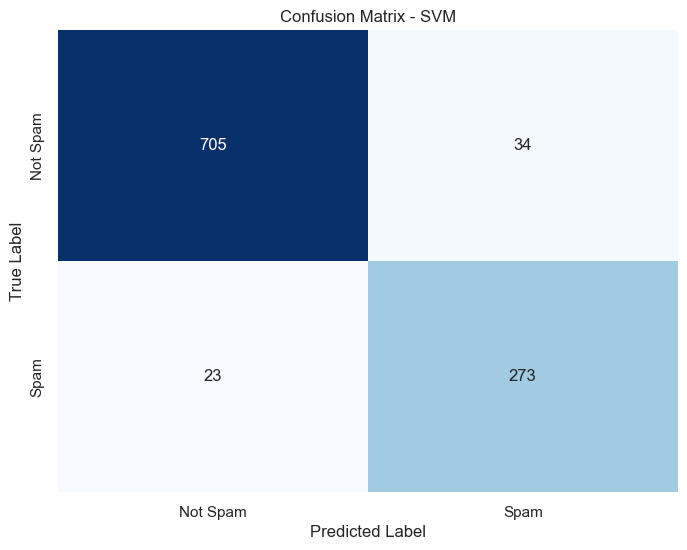

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# SVC Evaluation
print("SVC Evaluation:")
precision_svc = precision_score(Y_test, y_pred_svc)
recall_svc = recall_score(Y_test, y_pred_svc)
f1_svc = f1_score(Y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(Y_test, y_pred_svc)

print(f"Accuracy: {accuracy_svc:.2f}")
print(f"Precision: {precision_svc:.2f}")
print(f"Recall: {recall_svc:.2f}")
print(f"F1 Score: {f1_svc:.2f}")
print(f"ROC-AUC: {roc_auc_svc:.2f}")

# Calculate the confusion matrix
conf_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


### Random Rorest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50)

# Train the classifier
rf_classifier.fit(X_train, Y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Print classification report
print(classification_report(Y_test, y_pred_rf))

Random Forest Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       739
           1       0.95      0.93      0.94       296

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035




Random Forest Evaluation:
Accuracy: 0.97
Precision: 0.95
Recall: 0.93
F1 Score: 0.94
ROC-AUC: 0.96


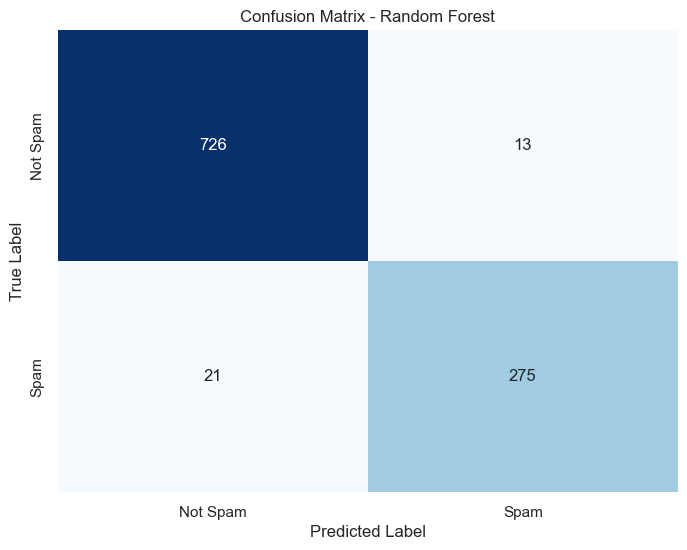

In [10]:
# Random Forest Evaluation
print("\nRandom Forest Evaluation:")
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(Y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### k-Fold cross validation

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Perform k-fold cross-validation for a given classifier and calculate its metrics
def cross_validation(classifier, X, Y, k=10, scoring='accuracy'):

    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(classifier, X, Y, cv=kfold, scoring=scoring)
    
    # Predict probabilities for each fold
    y_prob = cross_val_predict(classifier, X, Y, cv=kfold, method='predict_proba')[:, 1]

    acc_test_list = []
    acc_train_list = []
    auc_test_list = []
    auc_train_list = []
    conf_matrix_list = []

    # Loop through the folds
    for fold, (train, test) in enumerate(kfold.split(X, Y), 1):
        classifier.fit(X[train], Y[train])

        # Calculate accuracy for test and training sets
        y_pred_test = classifier.predict(X[test])
        acc_test = accuracy_score(Y[test], y_pred_test)
        acc_train = accuracy_score(Y[train], classifier.predict(X[train]))
        acc_test_list.append(acc_test)
        acc_train_list.append(acc_train)

        # Calculate AUC for test and training sets
        fpr_test, tpr_test, _ = roc_curve(Y[test], classifier.predict_proba(X[test])[:, 1])
        roc_auc_test = auc(fpr_test, tpr_test)

        fpr_train, tpr_train, _ = roc_curve(Y[train], classifier.predict_proba(X[train])[:, 1])
        roc_auc_train = auc(fpr_train, tpr_train)

        auc_test_list.append(roc_auc_test)
        auc_train_list.append(roc_auc_train)
        
        # Calculate confusion matrix for the test set
        conf_matrix_test = confusion_matrix(Y[test], y_pred_test)
        conf_matrix_list.append(conf_matrix_test)

    # Calculate mean for accuracy
    mean_acc_test = np.mean(acc_test_list)
    mean_acc_train = np.mean(acc_train_list)

    # Calculate mean for AUC
    mean_auc_test = np.mean(auc_test_list)
    mean_auc_train = np.mean(auc_train_list)

    # Calculate ACC ratio and AUC ratio
    acc_ratio = mean_acc_test / mean_acc_train
    auc_ratio = mean_auc_test / mean_auc_train
    
    df_metrics = pd.DataFrame({
    'Fold': range(1, len(acc_test_list) + 1),
    'ACC Test': acc_test_list,
    'ACC Training': acc_train_list,
    'ACC Ratio': [test / train for test, train in zip(acc_test_list, acc_train_list)],
    'AUC Test': auc_test_list,
    'AUC Training': auc_train_list,
    'AUC Ratio': [test / train for test, train in zip(auc_test_list, auc_train_list)],
    'CONF_MTX': conf_matrix_list
    })

    # Display the DataFrame
    print(df_metrics)

    # Print the results
    print("\nCross-Validation Metrics:")
    print(f"ACC Test: {mean_acc_test:.2f}")
    print(f"ACC Training: {mean_acc_train:.2f}")
    print(f"ACC Ratio: {acc_ratio:.2f}")
    print(f"AUC Test: {mean_auc_test:.2f}")
    print(f"AUC Training: {mean_auc_train:.2f}")
    print(f"AUC Ratio: {auc_ratio:.2f}")

    plt.figure(figsize=(12, 6))
    
    for train, test in kfold.split(X, Y):
        classifier.fit(X[train], Y[train])
        fpr, tpr, _ = roc_curve(Y[test], y_prob[test])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', alpha=0.6)

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

   Fold  ACC Test  ACC Training  ACC Ratio  AUC Test  AUC Training  AUC Ratio  \
0     1  0.974903      1.000000   0.974903  0.997556           1.0   0.997556   
1     2  0.974903      1.000000   0.974903  0.996481           1.0   0.996481   
2     3  0.974855      1.000000   0.974855  0.995575           1.0   0.995575   
3     4  0.974855      1.000000   0.974855  0.996440           1.0   0.996440   
4     5  0.972921      1.000000   0.972921  0.993686           1.0   0.993686   
5     6  0.972921      1.000000   0.972921  0.993965           1.0   0.993965   
6     7  0.963250      0.999785   0.963456  0.994314           1.0   0.994314   
7     8  0.972921      1.000000   0.972921  0.995536           1.0   0.995536   
8     9  0.955513      1.000000   0.955513  0.993372           1.0   0.993372   
9    10  0.965184      1.000000   0.965184  0.994731           1.0   0.994731   

                CONF_MTX  
0   [[359, 6], [7, 146]]  
1   [[367, 7], [6, 138]]  
2   [[352, 7], [6, 152]]  


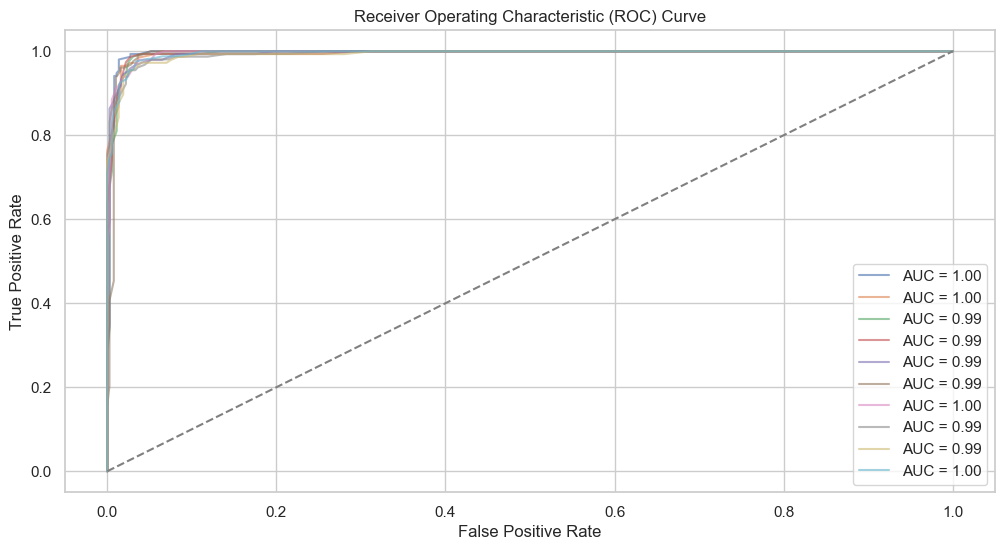

In [12]:
kfolds = 10

# Random Forest Classifier (RF)
rf_classifier = RandomForestClassifier(n_estimators=50)
cross_validation(rf_classifier, X, Y, kfolds)

   Fold  ACC Test  ACC Training  ACC Ratio  AUC Test  AUC Training  AUC Ratio  \
0     1  0.947876      0.999785   0.948080  0.971779           1.0   0.971779   
1     2  0.945946      0.999785   0.946149  0.980485           1.0   0.980485   
2     3  0.955513      0.999785   0.955718  0.980695           1.0   0.980695   
3     4  0.963250      0.999785   0.963456  0.978967           1.0   0.978967   
4     5  0.953578      0.999785   0.953783  0.979711           1.0   0.979711   
5     6  0.957447      1.000000   0.957447  0.980499           1.0   0.980499   
6     7  0.938104      0.999785   0.938306  0.970098           1.0   0.970098   
7     8  0.949710      0.999785   0.949914  0.978551           1.0   0.978551   
8     9  0.947776      0.999785   0.947979  0.974689           1.0   0.974689   
9    10  0.945841      0.999785   0.946045  0.973398           1.0   0.973398   

                 CONF_MTX  
0  [[351, 14], [13, 140]]  
1  [[359, 15], [13, 131]]  
2  [[349, 10], [13, 145]

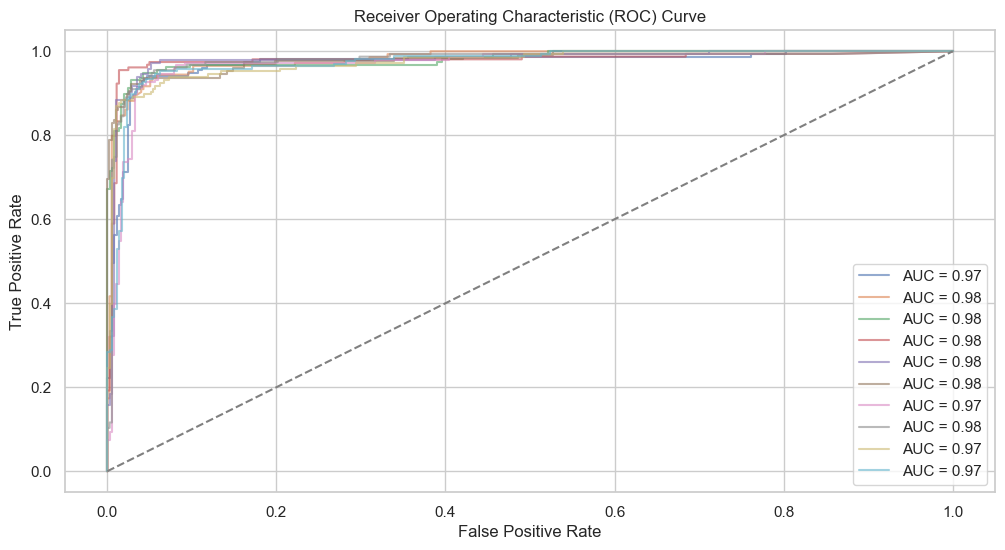

In [13]:
kfolds=10

# Support Vector Classifier (SVC)
svc_classifier = SVC(C=1.0, kernel='linear', probability=True)
cross_validation(svc_classifier, X, Y, kfolds)

### Comparing results


Accuracy Comparison:
Accuracy - Random Forest: 96.71%
Accuracy - SVC: 94.49%

Confusion Matrix Comparison:


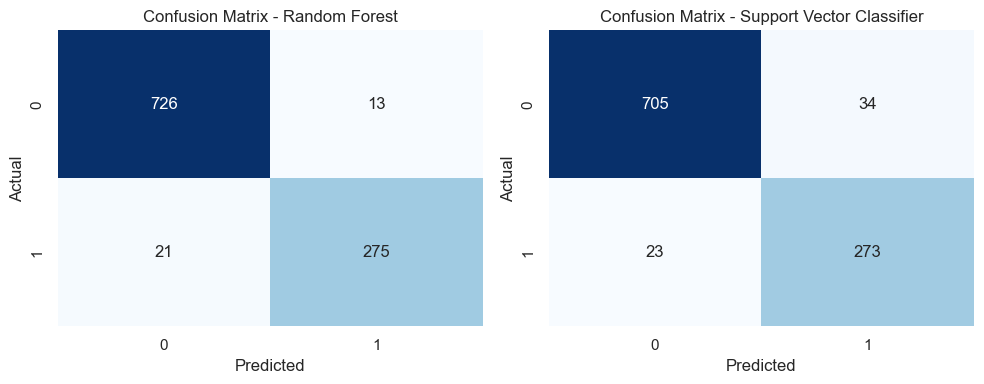

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare Accuracy
print("\nAccuracy Comparison:")
print(f"Accuracy - Random Forest: {accuracy_rf:.2%}")
print(f"Accuracy - SVC: {accuracy_svc:.2%}")

print("\nConfusion Matrix Comparison:")
# Visualize Confusion Matrix for Random Forest
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Visualize Confusion Matrix for SVC
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()